# Unit2-Example5 Use of Decision Trees
## Subject: Machine Learning - MSc. Computational Biology 
Author: Esteban García-Cuesta, Departamento de Inteligencia Artificial, UPM (License CC-BY-NC)

This code has been developed to be used exclusively for educational purposes.

## Objectives: 
  - Learn how the Decision Tree Classifier model works (Part I)
  - Learn how to interpret confusion matrix results (Part II)
  - Learn how to visualize and interpret the tree structure (Part III)
  - Learn how to apply Decision Tree Classifiers (Parts I, II, III)

## TO-DO as homework
  - Try different levels of depth of the tree and interpret how the rules change.

In [1]:
#Part I Learn how the Decision Tree Classifier model works

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


#Load the data from the zoo.csv file
path ='zoo.csv'
data = pd.read_csv(path)

#Extract the X input data and the labels y
X = data.iloc[:,1:17]
y = data.iloc[:,17]

#This counters are used to obtain the accuracy "by hand"
contTrain = 0
contTest = 0

# Split train and test using sklearn.model_selection.train_test_split function
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.20, random_state=np.random.randint(100,size=1)[0])

#Convert pandas df to numerical arrays
XTrain = XTrain.values
XTest = XTest.values
yTrain = yTrain.values
yTest = yTest.values

#Define parameters of the decision tree to be checked with cross-validation
param_grid = {'min_samples_leaf': [2,5,10],
              'min_samples_split': [5, 10],
              'max_depth':[2,5,10,100],
              'criterion':['entropy','gini']}

# Create a gridsearch using the Decision Tree Classifier
clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=4)

# Train the classifier using training dataset
clf.fit(XTrain , yTrain)

#Obtain in the variable model the best Decision Tree classifier
print("Best estimator found by grid search:")
print(clf.best_estimator_)
model = clf.best_estimator_

#Calculate the Cross-validation error durint the training step
scores = cross_val_score(model, XTrain, yTrain, cv=4, scoring='accuracy')
print('Validation classification Accuracies: ', + scores)
print('Mean Validation Classification Accuracy: ', + np.mean(scores))


# Compute the train prediction according to the model
yhatTrain = clf.predict(XTrain)

# Check the result on the train examples
#print('Predicted value : ' + str(yhat) , ', real target : ' + str(yTrain))
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

# Compute the test prediction according to the model
yhatTest = clf.predict(XTest)

# Check the result on the test examples
#print('Predicted value : ' + str(yhat) , ', real target : ' + str(yTest))
for i in range(0,len(yTest),1) :
    if (yhatTest[i] == yTest[i]):
        contTest = contTest + 1


#Return the metric of accuracy
print('The train accuracy is: ' + str(contTrain/len(yTrain)))
print('The test accuracy is: ' + str(contTest/len(yTest)))


FileNotFoundError: ignored

In [ ]:
#Part II Learn how to interpret confusion matrix results

from sklearn.metrics import classification_report,confusion_matrix

#Print train confusion matrix
print('----------------Train Confusion Matrix------------------')
print(confusion_matrix(yTrain,yhatTrain))
print(classification_report(yTrain,yhatTrain))


In [ ]:
#Part II Learn how to interpret confusion matrix results

#Print test confusion matrix
print('----------------Test Confusion Matrix------------------')
print(confusion_matrix(yTest,yhatTest))
print(classification_report(yTest,yhatTest))


----------------Test Confusion Matrix------------------
[[9 0 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 5 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



In [ ]:
#Part III - Learn how to visualize and interpret the tree structure

from sklearn.tree import export_text

texto_modelo = export_text(
                    decision_tree = model,
                    feature_names = ['Hair','Feathers','Eggs','Milk','Airbone','Aquatic','Predator','Toothed','Backbone,','Breathes','Venomous','fins','legs','tail','domestic','catsize']
               )
print(texto_modelo)

|--- Milk <= 0.50
|   |--- Feathers <= 0.50
|   |   |--- fins <= 0.50
|   |   |   |--- Backbone, <= 0.50
|   |   |   |   |--- Airbone <= 0.50
|   |   |   |   |   |--- Predator <= 0.50
|   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |--- Predator >  0.50
|   |   |   |   |   |   |--- class: 7
|   |   |   |   |--- Airbone >  0.50
|   |   |   |   |   |--- class: 6
|   |   |   |--- Backbone, >  0.50
|   |   |   |   |--- Aquatic <= 0.50
|   |   |   |   |   |--- class: 3
|   |   |   |   |--- Aquatic >  0.50
|   |   |   |   |   |--- class: 5
|   |   |--- fins >  0.50
|   |   |   |--- class: 4
|   |--- Feathers >  0.50
|   |   |--- class: 2
|--- Milk >  0.50
|   |--- class: 1



Profundidad del árbol: 6
Número de nodos terminales: 8


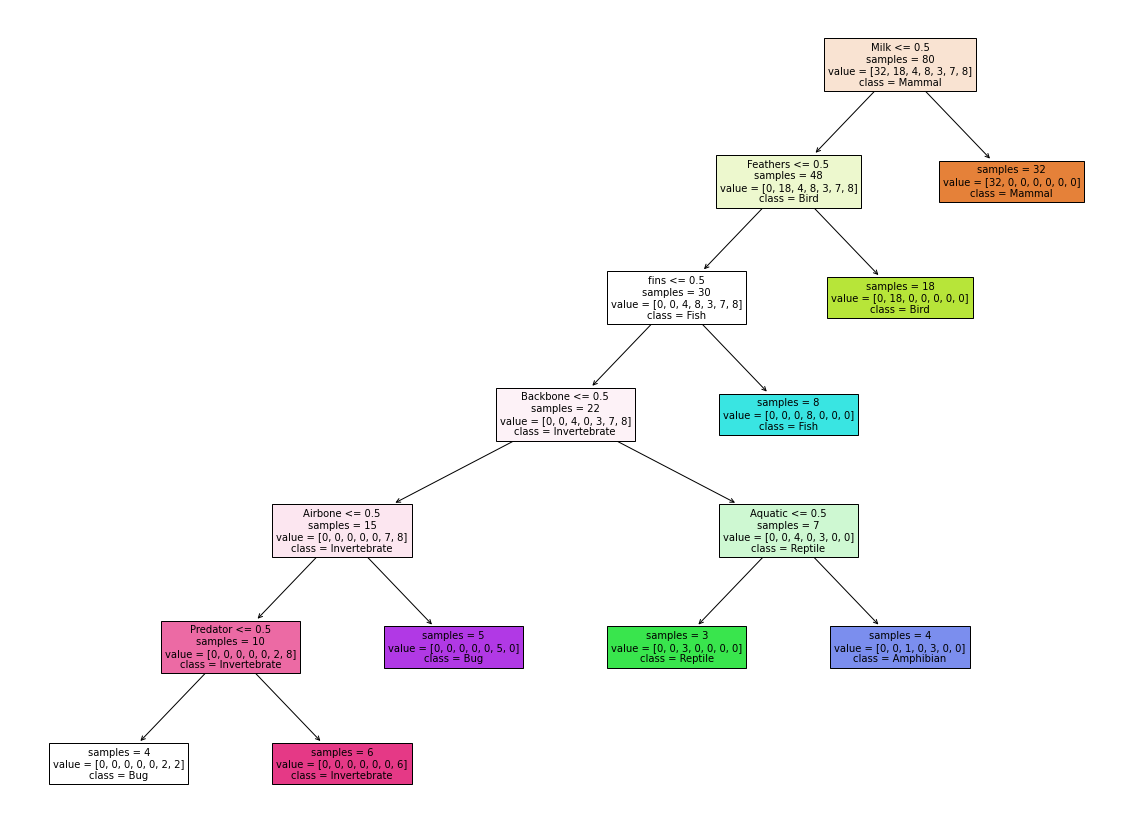

In [ ]:
#Part III Visualization of the learned tree classifier using plot_tree object

from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(20, 15))

print(f"Profundidad del árbol: {model.get_depth()}")
print(f"Número de nodos terminales: {model.get_n_leaves()}")

plot = plot_tree(
            decision_tree = model,
            feature_names = ['Hair','Feathers','Eggs','Milk','Airbone','Aquatic','Predator','Toothed','Backbone','Breathes','Venomous','fins','legs','tail','domestic','catsize'],
            class_names   = ['Mammal','Bird','Reptile','Fish','Amphibian','Bug','Invertebrate'],
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )